In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

df_fr = pd.read_csv("Simulation_Outputs_fr", delimiter="\t", index_col =False)
df_sp = pd.read_csv("Simulation_Outputs_sp", delimiter="\t", index_col =False)
Occupancy = pd.read_csv("Occupancy_per_hour", delimiter="\t")
df2=pd.read_csv("consommation_fr_sp.csv")

In [5]:
df2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,heat_on,clusters
0,0.000000,1700.066294,1347.984793,1554.008583,1723.533501,1868.834847,2706.914595,3546.369880,4375.875038,3647.778508,...,64.605559,301.754998,71.806798,383.298965,660.49970,912.855637,1144.154062,1353.900588,1,2.0
1,1491.939056,1547.782339,1581.992606,1621.999496,1665.591626,1677.862089,2299.480193,2891.085462,3452.262539,2493.089562,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1,2.0
2,0.000000,23.109325,197.050531,463.498337,679.743637,864.415518,1589.387942,2319.284930,3009.934551,1909.953089,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1,2.0
3,0.000000,0.000000,0.000000,88.114725,280.653789,505.875630,1400.215036,2275.884541,3122.756211,2068.535478,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1,2.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,29.507561,713.622089,1425.397605,2108.474937,2187.767164,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,797.493378,1701.459548,2568.012685,1551.418050,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1,1.0
726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,248.260999,989.186457,1129.959521,...,0.000000,0.000000,0.000000,0.000000,0.00000,91.489895,71.502593,266.739100,1,1.0
727,445.890785,606.708997,766.267599,911.975663,1029.851410,1140.923417,1719.279992,2312.225298,2385.738571,2122.199647,...,0.000000,103.248620,76.841441,244.216429,395.65917,535.265783,665.652928,787.656445,1,2.0
728,902.980549,1000.802768,1086.335039,1167.336739,1233.104153,1293.807695,1349.608617,1397.227213,1435.250348,926.771927,...,0.000000,0.000000,0.000000,20.416049,0.00000,212.726838,400.229836,591.838128,1,2.0


In [11]:
col_2_fr = df_fr.iloc[:, 1].values
col_2_sp = df_sp.iloc[:, 1].values
temp_ext_fr= pd.DataFrame(col_2_fr.reshape(-1, 24))
temp_ext_sp= pd.DataFrame(col_2_sp.reshape(-1, 24))
temp_ext_fr_sp = pd.concat([temp_ext_fr, temp_ext_sp], axis=0).reset_index(drop=True)
temp_ext_fr_sp["clusters"]=df2["clusters"]

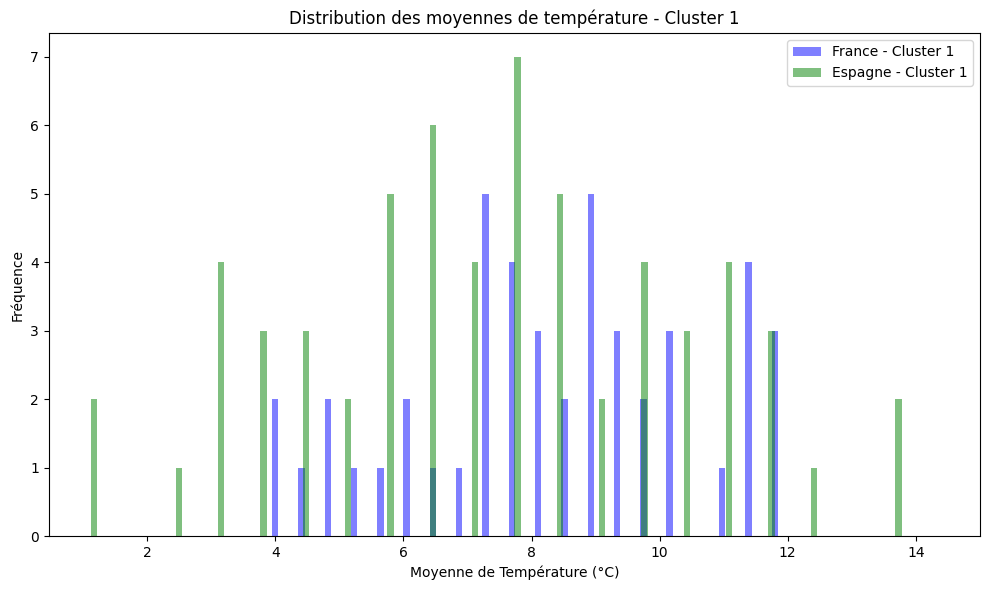

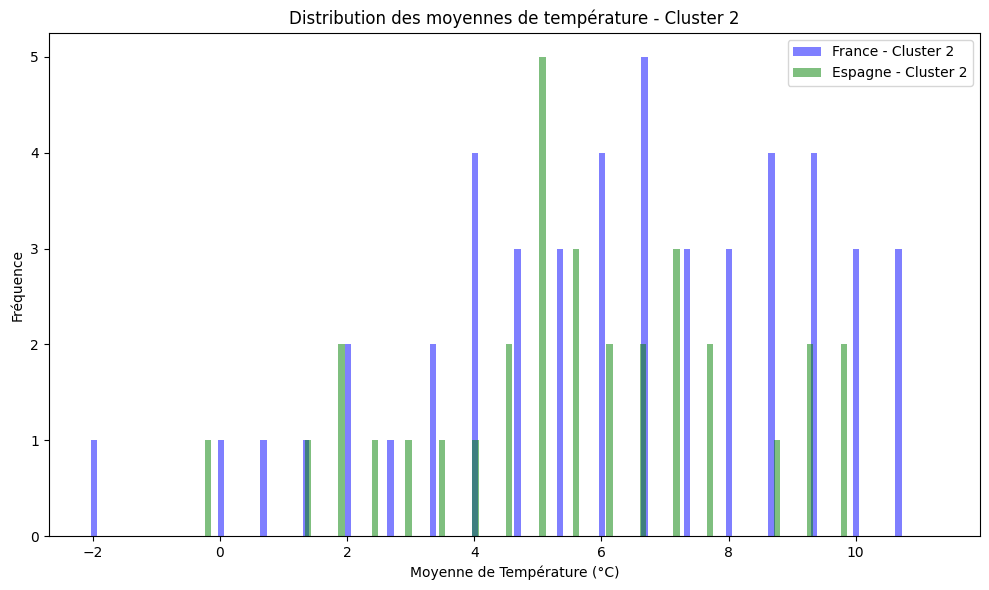

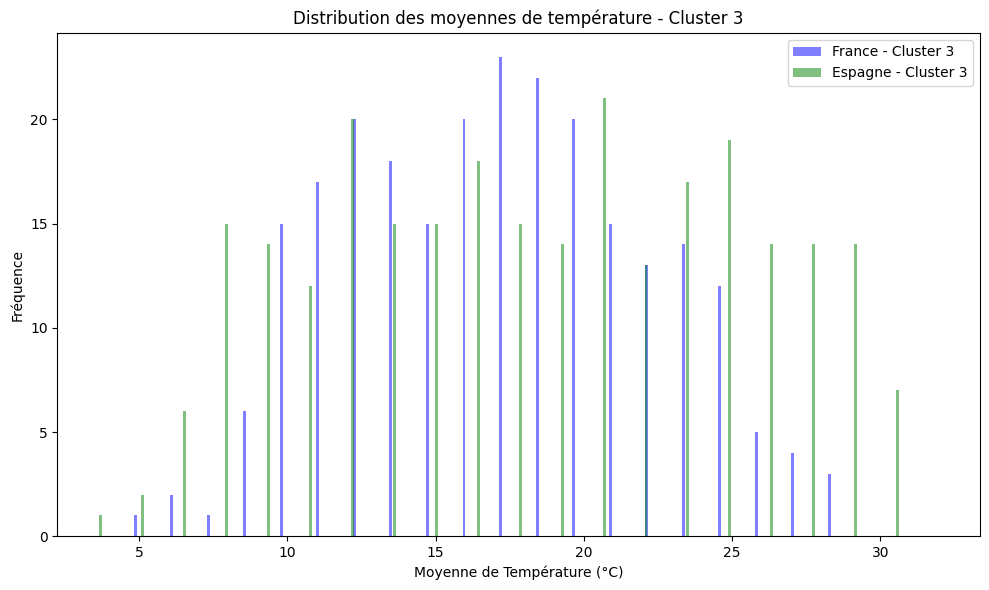

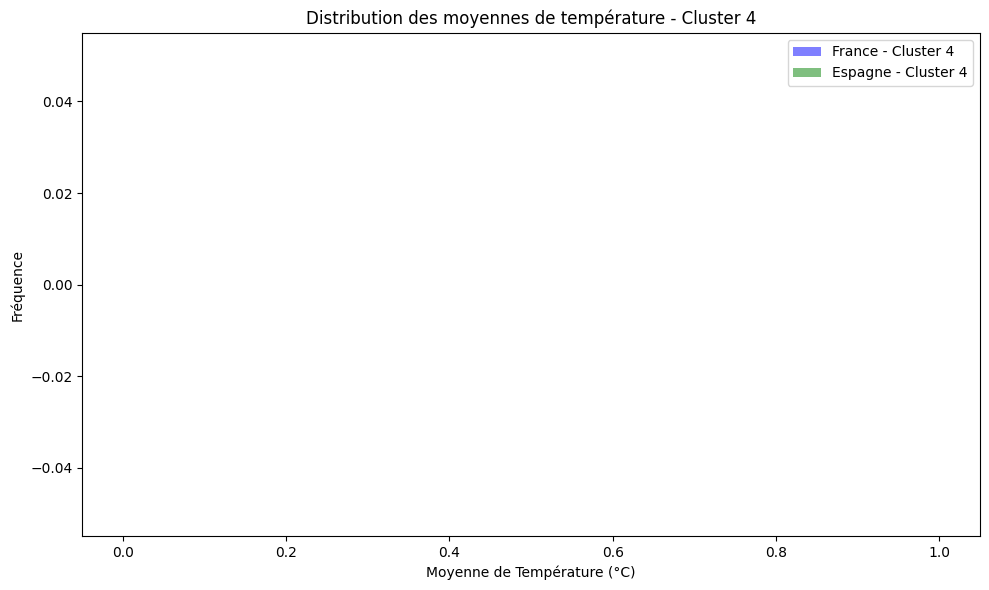

In [25]:

temp_ext_fr_sp2 = temp_ext_fr_sp.copy()
temperature_columns = temp_ext_fr_sp2.columns[:-1]
temp_ext_fr_sp2['mean_temperature'] = temp_ext_fr_sp2[temperature_columns].mean(axis=1)

france_data = temp_ext_fr_sp2.iloc[:365]  
spain_data = temp_ext_fr_sp2.iloc[365:] 
for cluster in range(1, 5):  
    plt.figure(figsize=(10, 6)) 
    france_cluster_data = france_data[france_data['clusters'] == cluster]['mean_temperature']
    

    spain_cluster_data = spain_data[spain_data['clusters'] == cluster]['mean_temperature']

    plt.hist(france_cluster_data, bins=20, alpha=0.5, label=f'France - Cluster {cluster}', color='blue', width=0.1)
    plt.hist(spain_cluster_data, bins=20, alpha=0.5, label=f'Espagne - Cluster {cluster}', color='green', width=0.1)


    plt.xlabel('Moyenne de Température (°C)')
    plt.ylabel('Fréquence')
    plt.title(f'Distribution des moyennes de température - Cluster {cluster}')
    plt.legend(loc='upper right')


    plt.tight_layout()
    plt.show()


In [13]:
def standardize_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [14]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [15]:
def evaluate_models_split(X_train, X_test, y_train, y_test , models):
  
    
    results = {}
    
    for name, model in models.items():
        print(f"\n Évaluation de {name} avec train_test_split...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred) 

        results[name] = {"f1_score": f1, "accuracy": accuracy}
        
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies classes')
        plt.title(f'Matrice de confusion - {name}')
        plt.show()
        
        print(f"{name} - Accuracy: {accuracy:.4f} - F1 Score: {f1:.4f}")
        print("###################################################################")
    
    return results


In [16]:


def evaluate_models_cv(X, y, models, cv=4):
    results = {}

    for name, model in models.items():
        print(f"\n Évaluation de {name} avec Cross Validation ({cv}-folds)...")

        scoring = ["accuracy", "f1_weighted"]
        scores = {}

        for metric in scoring:
            score = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), scoring=metric)
            scores[metric] = np.mean(score)  
        results[name] = scores

        print(f"{name} - Accuracy: {scores['accuracy']:.4f} - F1 Score: {scores['f1_weighted']:.4f}")
        print("###################################################################")

    return results


*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************

 Évaluation de Random Forest avec train_test_split...


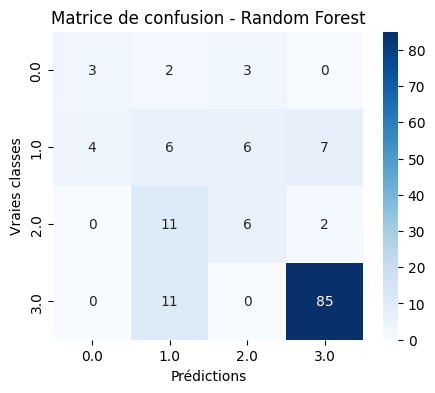

Random Forest - Accuracy: 0.6849 - F1 Score: 0.6918
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


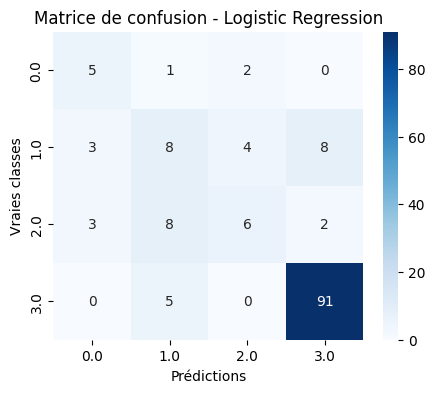

Logistic Regression - Accuracy: 0.7534 - F1 Score: 0.7427
###################################################################

 Évaluation de SVC avec train_test_split...


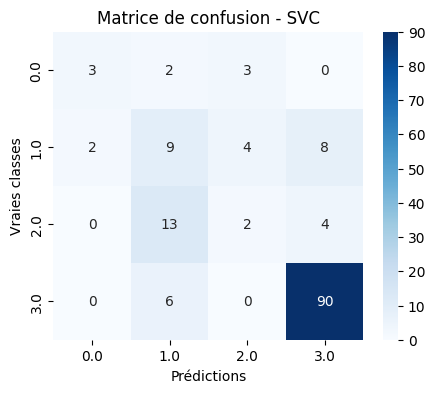

SVC - Accuracy: 0.7123 - F1 Score: 0.6951
###################################################################

 Évaluation de KNN avec train_test_split...


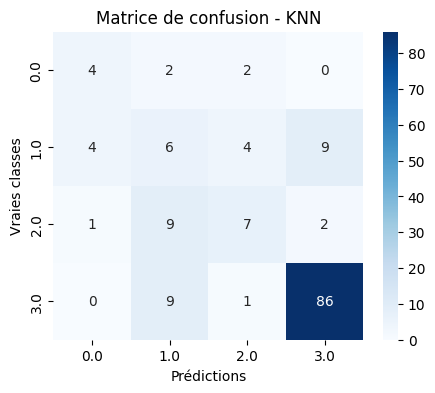

KNN - Accuracy: 0.7055 - F1 Score: 0.7056
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


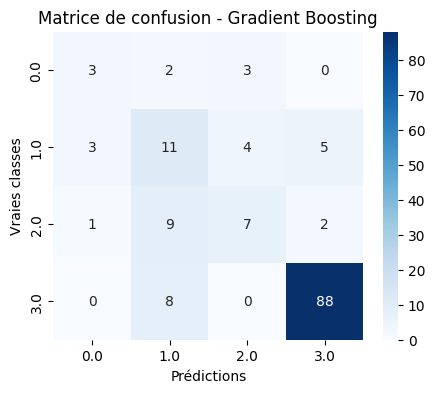

Gradient Boosting - Accuracy: 0.7466 - F1 Score: 0.7484
###################################################################


In [18]:
print("*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************")
X=temp_ext_fr_sp.drop(columns=["clusters"])
y=temp_ext_fr_sp["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [19]:
print("*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.7767 - F1 Score: 0.7715
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.7849 - F1 Score: 0.7755
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.7808 - F1 Score: 0.7691
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.7671 - F1 Score: 0.7662
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.7808 - F1 Score: 0.7767
##################

**********************************************Prédiction en fonction de TEXT  avec 3 clusters**********************************************

 Évaluation de Random Forest avec train_test_split...


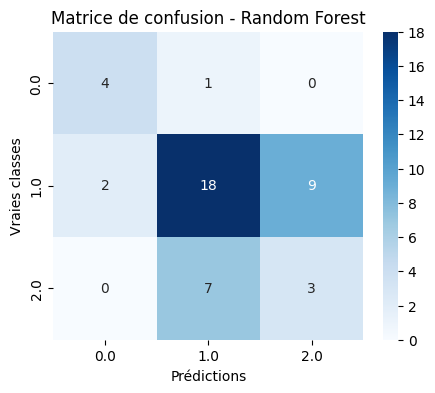

Random Forest - Accuracy: 0.5682 - F1 Score: 0.5760
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


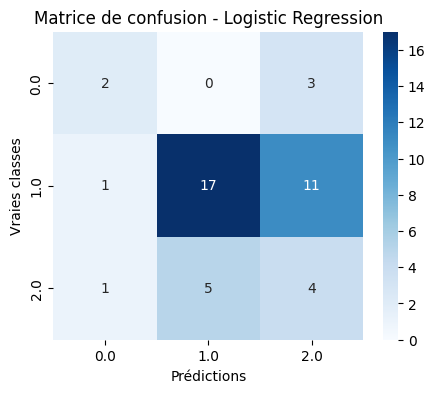

Logistic Regression - Accuracy: 0.5227 - F1 Score: 0.5548
###################################################################

 Évaluation de SVC avec train_test_split...


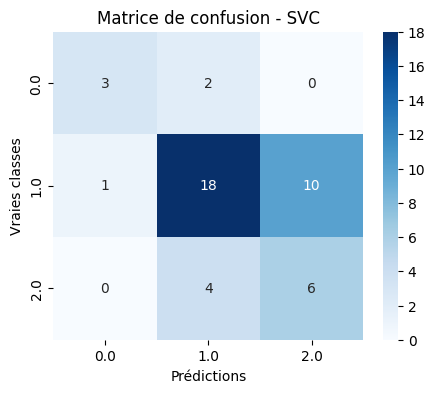

SVC - Accuracy: 0.6136 - F1 Score: 0.6283
###################################################################

 Évaluation de KNN avec train_test_split...


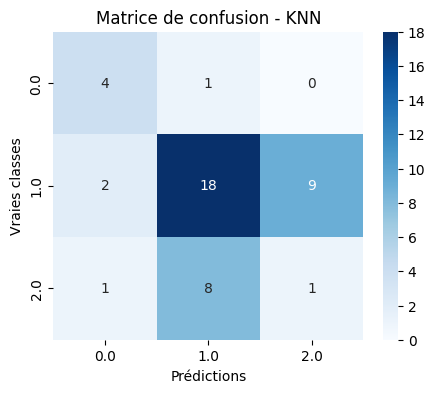

KNN - Accuracy: 0.5227 - F1 Score: 0.5222
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


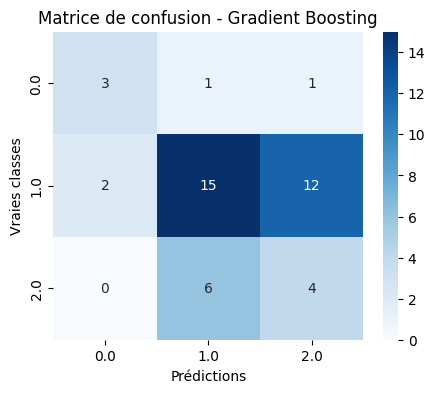

Gradient Boosting - Accuracy: 0.5000 - F1 Score: 0.5232
###################################################################


In [28]:
print("**********************************************Prédiction en fonction de TEXT  avec 3 clusters**********************************************")
temp_ext_fr_sp2=temp_ext_fr_sp[temp_ext_fr_sp["clusters"]!=3]
X=temp_ext_fr_sp2.drop(columns=["clusters"])
y=temp_ext_fr_sp2["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [29]:
print("**********************************************Prédiction en fonction de TEXT  avec 3 clusters**********************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

**********************************************Prédiction en fonction de TEXT  avec 3 clusters**********************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.5598 - F1 Score: 0.5529
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.5646 - F1 Score: 0.5607
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.5463 - F1 Score: 0.5147
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.5459 - F1 Score: 0.5368
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.5227 - F1 Score: 0.5198
#######################

In [30]:
df_gen=pd.read_csv("df_generer.csv")

In [31]:
df_gen

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,clusters
0,0.50,0.10,-0.75,-1.45,-1.95,-2.50,-3.00,-3.40,-3.70,-3.40,...,-0.45,-1.00,-1.90,-2.55,-2.85,-3.15,-3.45,-3.75,-4.05,2.0
1,-3.90,-3.20,-2.45,-1.85,-1.35,-0.85,-0.40,-0.05,0.25,1.75,...,12.45,11.75,10.35,9.30,8.90,8.50,8.05,7.60,7.20,2.0
2,6.45,5.25,4.00,3.05,2.40,1.75,1.15,0.65,0.40,1.30,...,8.80,8.15,6.85,5.65,4.75,3.80,2.85,1.95,1.05,2.0
3,0.35,-0.25,-0.90,-1.40,-1.75,-2.10,-2.45,-2.70,-2.85,-1.95,...,5.85,5.15,3.80,2.80,2.40,2.00,1.60,1.20,0.80,2.0
4,5.50,5.05,4.60,4.25,4.00,3.80,3.60,3.40,3.30,4.10,...,10.10,9.65,8.60,7.95,7.85,7.70,7.55,7.45,7.30,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,9.30,8.70,8.10,7.65,7.30,6.95,6.70,6.45,6.45,7.30,...,11.50,10.95,10.15,9.55,9.20,8.85,8.55,8.25,7.95,3.0
2044,14.45,13.60,12.75,12.10,11.65,11.10,10.65,10.30,10.20,11.40,...,15.85,15.05,14.05,13.25,12.75,12.25,11.70,11.10,10.55,3.0
2045,10.15,9.85,9.50,9.20,8.95,8.75,8.50,8.00,8.15,9.05,...,11.20,11.10,10.75,10.40,10.20,9.95,9.75,9.60,9.40,3.0
2046,10.60,9.75,8.90,8.30,7.85,7.40,7.05,6.75,6.70,7.90,...,12.60,11.90,11.05,10.10,9.30,8.50,7.65,6.80,6.00,3.0


*******************************************Prédiction en fonction de TEXT avec 4 clusters, incluant les données générées***************************************

 Évaluation de Random Forest avec train_test_split...


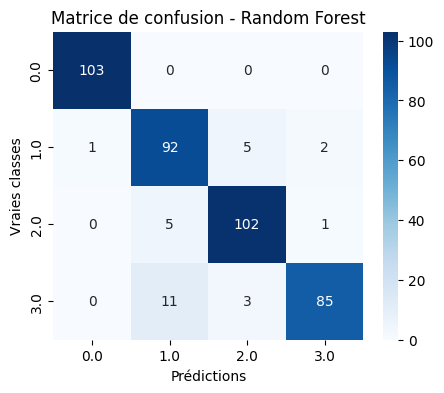

Random Forest - Accuracy: 0.9317 - F1 Score: 0.9318
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


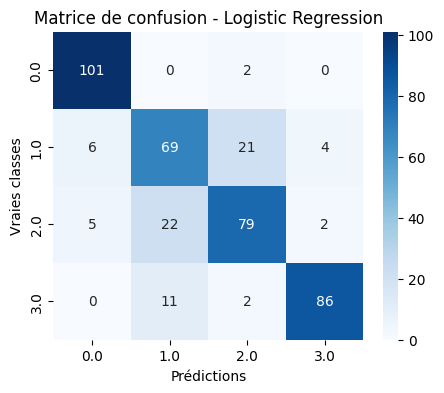

Logistic Regression - Accuracy: 0.8171 - F1 Score: 0.8164
###################################################################

 Évaluation de SVC avec train_test_split...


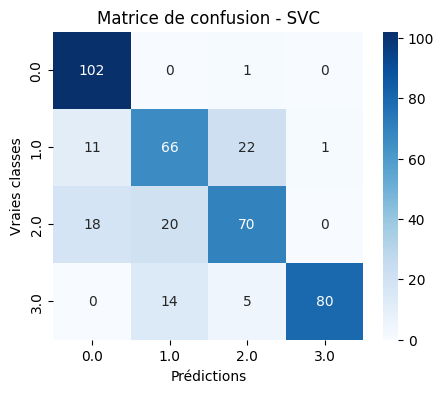

SVC - Accuracy: 0.7756 - F1 Score: 0.7736
###################################################################

 Évaluation de KNN avec train_test_split...


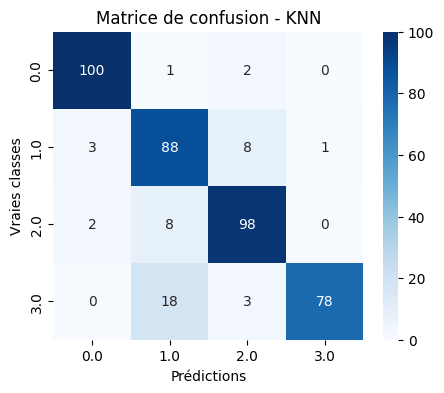

KNN - Accuracy: 0.8878 - F1 Score: 0.8886
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


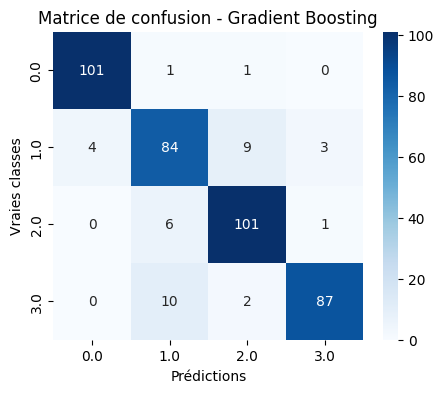

Gradient Boosting - Accuracy: 0.9098 - F1 Score: 0.9097
###################################################################


In [33]:
print("*******************************************Prédiction en fonction de TEXT avec 4 clusters, incluant les données générées***************************************")
X=df_gen.drop(columns=["clusters"])
y=df_gen["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [35]:
print("**********************************************Prédiction en fonction de TEXT  avec 4 clusters , incluant les données générées**********************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

**********************************************Prédiction en fonction de TEXT  avec 4 clusters , incluant les données générées**********************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9263 - F1 Score: 0.9264
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.7710 - F1 Score: 0.7688
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.7632 - F1 Score: 0.7601
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8931 - F1 Score: 0.8932
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.9043 - F1 Score